# TSF Task-6
   ## Prediction using Decision Tree Algorithm
   The purpose of this task is if we feed any new data to this classifier, it would be able to predict the right class accordingly.
  
  **Created by :- Hrishikesh Charkha**
  
  Let's get to it.

**Step 1- Imports**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

**Step-2 Reading the CSV file**

In [2]:
data = pd.read_csv('Task-6.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Dropping ID column as it is of no use.
data.drop('Id',axis=1,inplace=True)

In [5]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#Checking the shape of the data
data.shape

(150, 5)

In [7]:
#Checking if there is any null values
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
#Getting information realted to the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB



**So,the target column here is 'Species'**

In [9]:
#Describing the data
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Step-3 Exploratory Data Analysis**

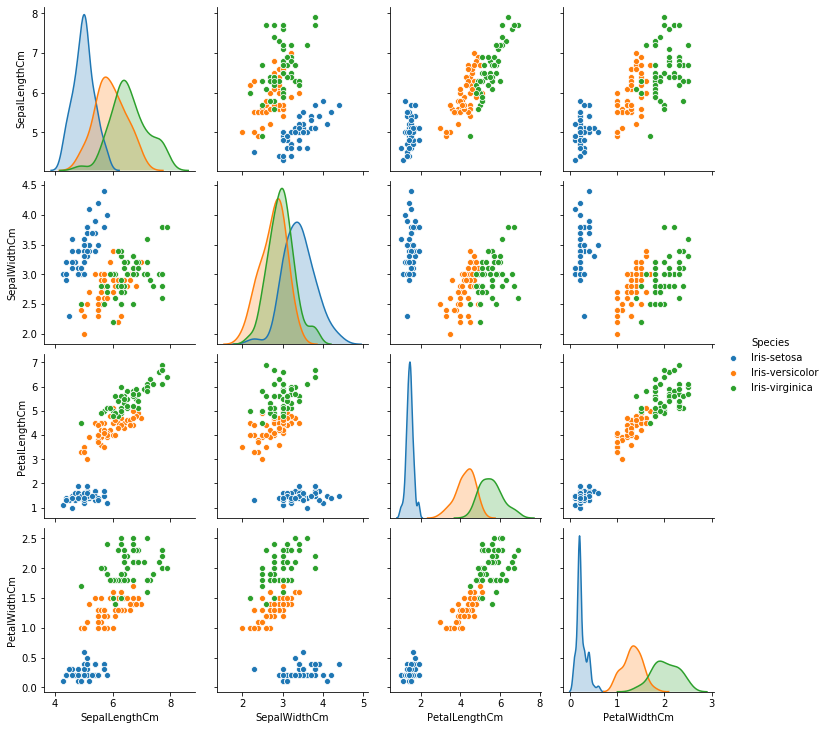

In [10]:
sns.pairplot(data,hue='Species')

Here, we can observe that species 'Iris-setosa' seems to be most seperable.

**Step-4 Training and Testing the Data for Decision Tree Algorithm**

In [11]:
X = data.drop('Species',axis=1)
y = data['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [12]:
dtree = DecisionTreeClassifier()

In [13]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
predictions = dtree.predict(X_test)

In [15]:
print(classification_report(y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.93      0.88      0.90        16
 Iris-virginica       0.87      0.93      0.90        14

       accuracy                           0.93        45
      macro avg       0.93      0.93      0.93        45
   weighted avg       0.93      0.93      0.93        45



In [16]:
print(confusion_matrix(y_test,predictions))

[[15  0  0]
 [ 0 14  2]
 [ 0  1 13]]


**Step 5 Visualizing the Tree**

In [20]:
from sklearn import tree 

names= list(data.columns[:-1])
categories = ['Iris-setosa','Iris-versicolor','Iris-virginica']
names

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

[Text(976.5, 1467.72, 'PetalLengthCm <= 2.45\ngini = 0.666\nsamples = 105\nvalue = [35, 34, 36]\nclass = Iris-virginica'),
 Text(732.375, 1141.56, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = Iris-setosa'),
 Text(1220.625, 1141.56, 'PetalWidthCm <= 1.75\ngini = 0.5\nsamples = 70\nvalue = [0, 34, 36]\nclass = Iris-virginica'),
 Text(976.5, 815.4000000000001, 'PetalLengthCm <= 4.95\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]\nclass = Iris-versicolor'),
 Text(488.25, 489.24, 'PetalWidthCm <= 1.65\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]\nclass = Iris-versicolor'),
 Text(244.125, 163.08000000000015, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]\nclass = Iris-versicolor'),
 Text(732.375, 163.08000000000015, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-virginica'),
 Text(1464.75, 489.24, 'SepalLengthCm <= 6.5\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = Iris-virginica'),
 Text(1220.625, 163.08000000000015, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3

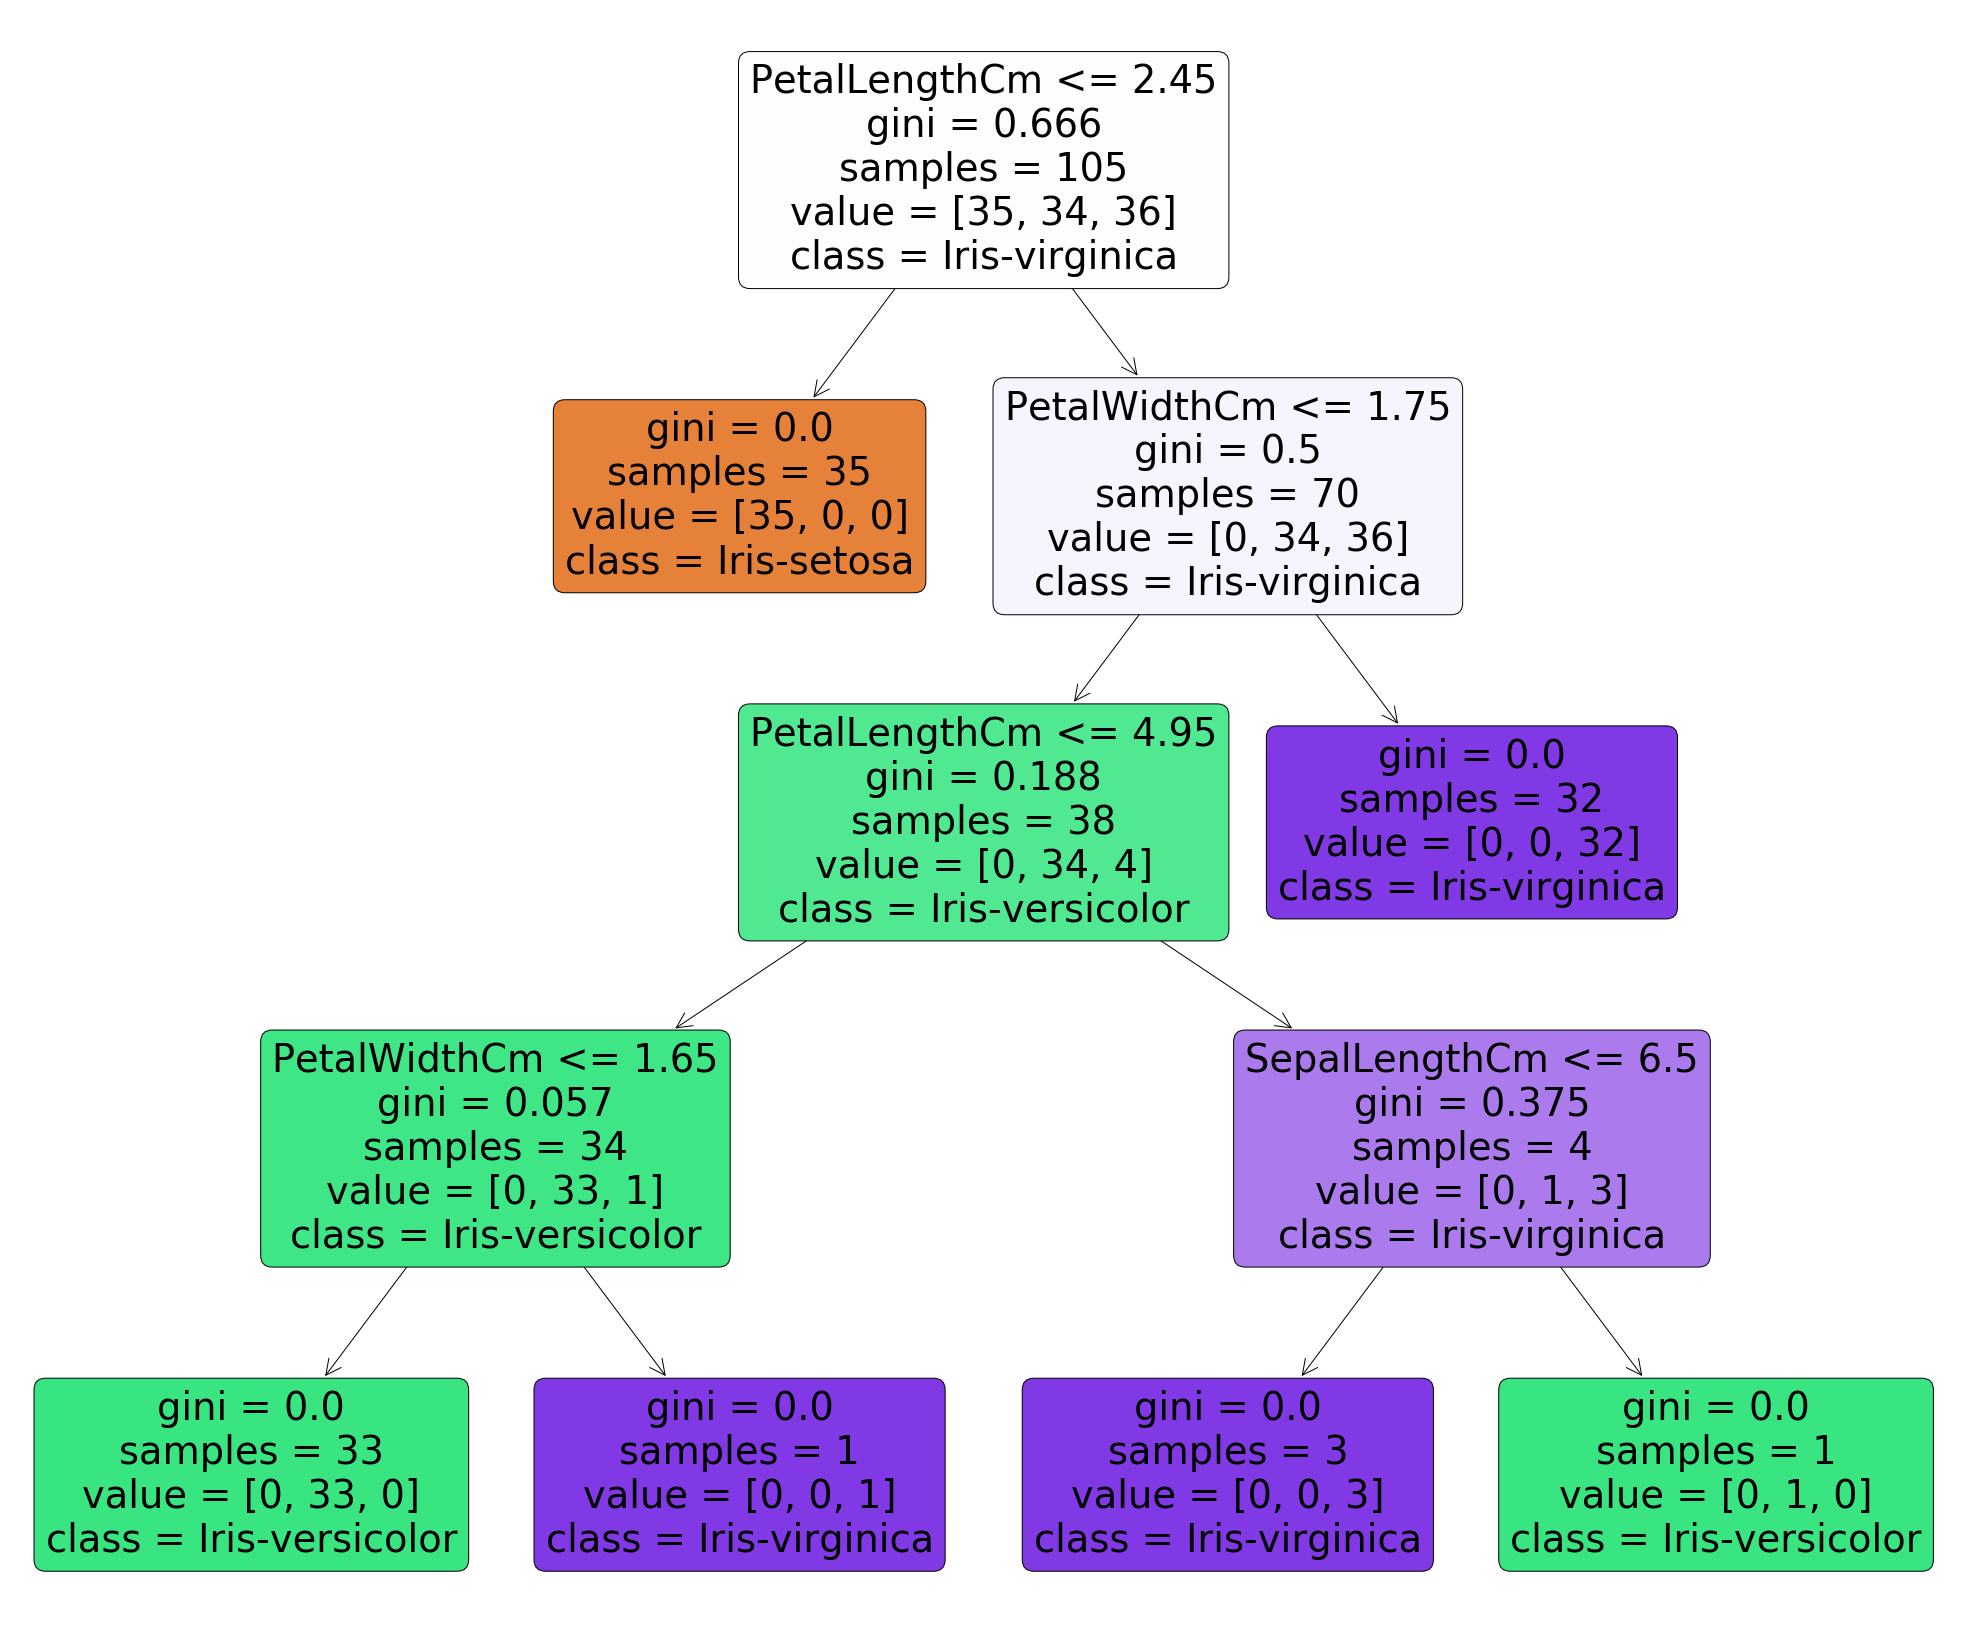

In [23]:
fig = plt.figure(figsize = (35,30))
tree.plot_tree(dtree,feature_names=names,class_names=categories,filled=True,precision=3,rounded=True)